In [1]:
# various imports
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import io
import requests
import tarfile

In [2]:
# grab data
# https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

url="https://raw.githubusercontent.com/mathewphilipc/deepSuperCon/master/SC_Magpie_Sep2017.csv"
s=requests.get(url).content
physdata=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
# Summarize data
physdata.head()

,name,Tc,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
0,Ba0.4K0.6Fe2As2,31.20,4.0,0.583781,0.506891,0.459606,0.441643,0.428710,30.360000,37.0,...,229.0,166.0,197.5,0.198312,0.126582,0.675105,0.000000,0.0,0.370230,0.101293
1,Ca0.4Ba1.25La1.25Cu3O6.98,40.10,5.0,0.606413,0.557901,0.543545,0.542136,0.541937,22.677795,49.0,...,229.0,12.0,12.0,0.277798,0.340779,0.381423,0.000000,0.0,0.803211,0.321647
2,Mo0.39Ru0.61,6.90,2.0,0.724017,0.659084,0.622509,0.613736,0.610693,43.220000,2.0,...,229.0,194.0,194.0,0.138504,0.000000,0.861496,0.000000,0.0,0.000400,0.000190
3,Tm4Os6Sn19,1.10,3.0,0.700772,0.663969,0.655637,0.655203,0.655173,58.000000,26.0,...,194.0,141.0,141.0,0.126638,0.082969,0.493450,0.296943,0.0,0.201983,0.036805
4,Nd1Bi0.99Pb0.01S2F0.3O0.7,4.85,6.0,0.512258,0.435720,0.405168,0.400893,0.400075,36.658000,75.0,...,225.0,12.0,70.0,0.187652,0.286921,0.187652,0.337774,0.0,0.866866,0.228340


In [4]:
physdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16415 entries, 0 to 16414
Columns: 147 entries, name to MeanIonicChar
dtypes: float64(146), object(1)
memory usage: 18.4+ MB


In [5]:
# for comparison, fetch housing data
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
#housing.head()

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# more comparison: fetch physdata cut off after 10 features
url="https://raw.githubusercontent.com/mathewphilipc/HandsOnDeep/master/SC_Magpie_Sep2017_abridged.csv"
s=requests.get(url).content
abridgedphysdata=pd.read_csv(io.StringIO(s.decode('utf-8')))

#abridgedphysdata.head()

In [8]:
abridgedphysdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16415 entries, 0 to 16414
Data columns (total 11 columns):
name              16414 non-null object
Tc                16415 non-null float64
NComp             16415 non-null float64
Comp_L2Norm       16415 non-null float64
Comp_L3Norm       16415 non-null float64
Comp_L5Norm       16415 non-null float64
Comp_L7Norm       16415 non-null float64
Comp_L10Norm      16415 non-null float64
mean_Number       16415 non-null float64
maxdiff_Number    16415 non-null float64
dev_Number        16415 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.4+ MB


In [9]:
# The reason for all these extra datasets:
# If I use the Magpie data in its raw form, it has "columns" but if housing,
# that has "Data columns" BUT if I truncate Magpie but otherwise don't touch
# it, the result has "Data columns." I was worried, but given that I can
# induce the name change just by adjusting the number of columns I assume it
# doesn't refer to anything different about the data type, just an
# abbreviation. Proceed with caution, but proceed.

In [10]:
#housing.describe()

In [11]:
#abridgedphysdata.describe()

In [12]:
physdata.describe()

,Tc,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,dev_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
count,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,...,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000
mean,17.966220,3.786446,0.663541,0.609817,0.585695,0.579668,0.576334,32.842059,42.681529,13.596227,...,223.241497,91.277577,118.920230,0.259574,0.198786,0.422535,0.119091,0.086449,0.433425,0.158973
std,26.984386,1.358167,0.112160,0.132439,0.145168,0.149769,0.152881,15.155786,20.945477,7.638709,...,14.684580,84.934917,93.050376,0.128694,0.140389,0.197422,0.177252,0.281028,0.329661,0.135500
min,0.000000,0.515528,0.319066,0.272511,0.229727,0.212819,0.201914,0.313650,0.000000,0.000000,...,0.176509,0.432386,0.467936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.095000,3.000000,0.598053,0.541583,0.512897,0.504257,0.502203,23.109568,28.000000,7.300625,...,225.000000,12.000000,12.000000,0.179477,0.068966,0.290632,0.000000,0.000000,0.109169,0.027993
50%,5.000000,4.000000,0.629303,0.577786,0.556537,0.550805,0.541284,27.550000,48.000000,15.055200,...,229.000000,63.000000,152.000000,0.252212,0.198576,0.378003,0.003027,0.000000,0.348856,0.099744
75%,22.500000,5.000000,0.728869,0.682824,0.668028,0.666816,0.666672,39.000000,56.000000,18.329480,...,229.000000,194.000000,197.500000,0.297619,0.325301,0.586667,0.198582,0.000000,0.787757,0.321113
max,143.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.000000,89.000000,43.000000,...,229.000000,229.000000,229.000000,1.000000,0.666667,1.000000,0.875000,1.000000,0.921450,0.536920


In [13]:
#housing.hist(bins=50, figsize=(20,15))

In [14]:
#abridgedphysdata.hist(bins=50, figsize=(20,15))

In [15]:
#physdata.hist(bins=50, figsize=(20,15))

In [16]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(physdata, test_size = 0.2, random_state = 42)


# Data visualization


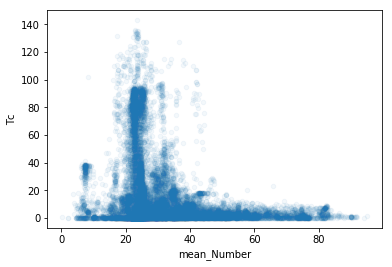

In [17]:
physdata.plot(kind="scatter", x="mean_Number", y="Tc", alpha=0.05)

In [22]:
# Fun with the correlation matrix
corr_matrix = physdata.corr()

# Check how much each feature correlates with Tc
corr_matrix["Tc"].sort_values(ascending=False)

# Evidently, nothing correlates strongly with Tc (as expected)

Tc                           1.000000
MeanIonicChar                0.536679
dev_Electronegativity        0.525331
MaxIonicChar                 0.521949
dev_GSvolume_pa              0.518394
NComp                        0.515523
maxdiff_Electronegativity    0.514880
maxdiff_GSvolume_pa          0.511076
dev_SpaceGroupNumber         0.501197
most_Electronegativity       0.496529
max_GSvolume_pa              0.488130
max_Electronegativity        0.480671
maxdiff_CovalentRadius       0.475009
maxdiff_SpaceGroupNumber     0.448953
dev_CovalentRadius           0.446526
dev_NpValence                0.445891
most_NpValence               0.425875
maxdiff_MendeleevNumber      0.418829
maxdiff_Column               0.411405
mean_Electronegativity       0.409189
maxdiff_NpValence            0.407554
max_NpValence                0.395098
maxdiff_Row                  0.392948
frac_pValence                0.387317
max_CovalentRadius           0.384677
dev_NdValence                0.366695
dev_Mendelee

In [ ]:
# MeanIonicChar correlates the most strongly

physdata.plot(kind="scatter", x="MeanIonicChar", y="Tc", alpha=0.05)

# Looks like this correlation is largely the result of a spike near one end


# Preparing data for ML
